## Observations and Insights

1. The gender of the mice was relatively even throughout the study. There were not any more females than there were males.
2. Capomulin and Ramicane were most effective and treating the tumor size.
3. There is a strong correlation between weight and tumor size as the coefficient is 0.84.

## Dependencies and starter code

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
study_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
study_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


## Summary statistics

In [40]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_data = study_data.groupby(["Drug Regimen"])

regimen_mean = regimen_data["Tumor Volume (mm3)"].mean()
regimen_median = regimen_data["Tumor Volume (mm3)"].median()
regimen_variance = regimen_data["Tumor Volume (mm3)"].var()
regimen_std = regimen_data["Tumor Volume (mm3)"].std()
regimen_sem = regimen_data["Tumor Volume (mm3)"].sem()

regimen_analysis = pd.DataFrame({"Tumor Vol. Mean": regimen_mean,
                                 "Tumor Vol. Median": regimen_median,
                                 "Tumor Vol. Variance": regimen_variance,
                                 "Tumor Vol. Standard Deviation": regimen_std,
                                 "Tumor Vol. SEM": regimen_sem})

regimen_analysis = regimen_analysis[["Tumor Vol. Mean", "Tumor Vol. Median", "Tumor Vol. Variance", "Tumor Vol. Standard Deviation", "Tumor Vol. SEM"]]

regimen_analysis

,Tumor Vol. Mean,Tumor Vol. Median,Tumor Vol. Variance,Tumor Vol. Standard Deviation,Tumor Vol. SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

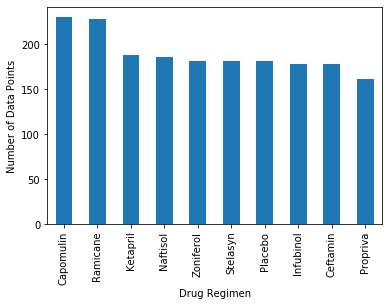

<Figure size 432x288 with 0 Axes>

In [41]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
drug_data_points = study_data["Drug Regimen"].value_counts()
drug_data_points.plot(kind="bar")

# Set a title for the chart
plt.ylabel("Number of Data Points")
plt.xlabel("Drug Regimen")
plt.show()
plt.tight_layout()

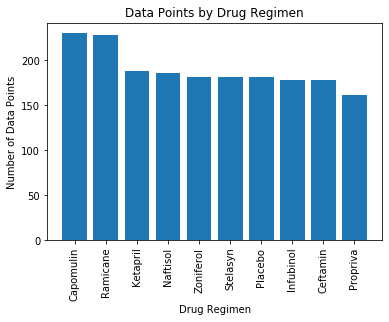

In [42]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
drug_regimen_data_points = study_data["Drug Regimen"].value_counts()

x_axis = np.arange(len(drug_regimen_data_points))
tick_location = [value for value in x_axis]

plt.bar(x_axis, drug_regimen_data_points)
plt.xticks(tick_location, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Data Points by Drug Regimen")
plt.show()


## Pie plots

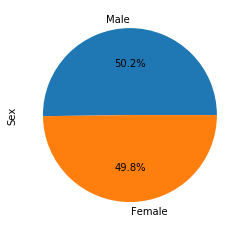

In [43]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender = study_data[["Mouse ID","Sex"]]
gender = gender.drop_duplicates()
gender_counts = gender["Sex"].value_counts()

gender_counts.plot(kind="pie", autopct="%1.1f%%")
plt.show()


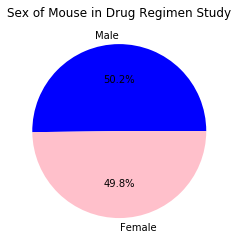

In [44]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = study_data[["Mouse ID","Sex"]]
gender = gender.drop_duplicates()
gender_counts = gender["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "pink"]
plt.pie(gender_counts, labels = labels, colors = colors, autopct = '%.1f%%')
plt.title('Sex of Mouse in Drug Regimen Study')
plt.show()

## Quartiles, outliers and boxplots

In [45]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 

tumor_size = study_data.groupby(["Mouse ID"]).max()
tumor_size = tumor_size.reset_index("Mouse ID")

tumor_size_g = tumor_size[["Mouse ID", "Timepoint"]]

tumor_size_g = pd.merge(tumor_size_g, study_data, on=['Mouse ID', 'Timepoint'], how="left")

tumor_size_g = tumor_size_g.loc[(tumor_size["Drug Regimen"]=="Capomulin") |
                            (tumor_size["Drug Regimen"]=="Ramicane") |
                            (tumor_size["Drug Regimen"]=="Infubinol") |
                            (tumor_size["Drug Regimen"]=="Ceftamin")]

tumor_size_g = tumor_size_g.set_index(["Drug Regimen"])

tumor_size_g

,Mouse ID,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Infubinol,a203,45,Female,20,23,67.973419,2
Infubinol,a251,45,Female,21,25,65.525743,1
Ceftamin,a275,45,Female,20,28,62.999356,3
Ramicane,a411,45,Male,3,22,38.407618,1
Ramicane,a444,45,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...
Ceftamin,y769,45,Female,6,27,68.594745,4
Capomulin,y793,45,Male,17,17,31.896238,2
Ceftamin,y865,45,Male,23,26,64.729837,3


In [46]:
#Capomulin
tumor_size_cap = tumor_size_g.loc["Capomulin","Tumor Volume (mm3)"]
quartiles = tumor_size_cap.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Capomulin")
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------")

#Ramicane
tumor_size_ram = tumor_size_g.loc["Ramicane", "Tumor Volume (mm3)"]
quartiles = tumor_size_ram.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Ramicane")
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------")

#Infubinol
tumor_size_inf = tumor_size_g.loc["Infubinol", "Tumor Volume (mm3)"]
quartiles = tumor_size_inf.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Infubinol")
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")
print("------------------------------")

#Ceftamin

tumor_size_cef = tumor_size_g.loc["Ceftamin", "Tumor Volume (mm3)"]
quartiles = tumor_size_cef.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print("Ceftamin")
print(f"The IQR is {iqr}")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

Capomulin
The IQR is 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
------------------------------
Ramicane
The IQR is 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
------------------------------
Infubinol
The IQR is 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
------------------------------
Ceftamin
The IQR is 15.577752179999997
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


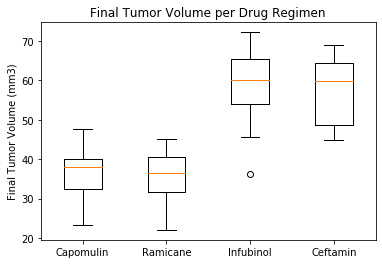

In [47]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume per Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
ax1.boxplot([tumor_size_cap, tumor_size_ram, tumor_size_inf, tumor_size_cef], labels=labels)
plt.show()

## Line and scatter plots

enter a Mouse IDl509


Text(0.5, 1.0, 'Capomulin Treatment of Mouse l509')

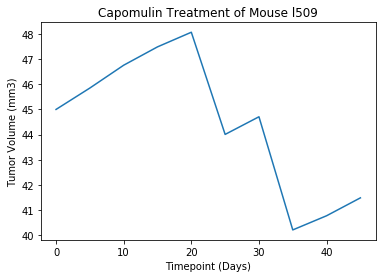

In [48]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse_id_group = study_data.set_index("Mouse ID")

mouse_cap = input("enter a Mouse ID")

timepoint = [0,5,10,15,20,25,30,35,40,45]

tumor_volume = mouse_id_group.loc[mouse_cap,["Tumor Volume (mm3)"]]


plt.plot(timepoint, tumor_volume)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse " + mouse_cap)

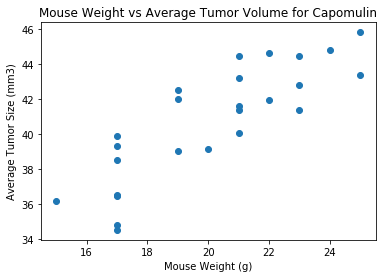

In [49]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

drug_regimen = study_data.groupby(["Drug Regimen","Mouse ID"])

mean_tumor_volume = pd.DataFrame(drug_regimen["Tumor Volume (mm3)"].mean())
mean_tumor_volume_cap = mean_tumor_volume.loc["Capomulin"]

weight_df = pd.DataFrame(drug_regimen["Weight (g)"].mean())
weight_cap = weight_df.loc["Capomulin"]

plt.scatter(weight_cap, mean_tumor_volume_cap, marker="o")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Average Tumor Size (mm3)")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin")
plt.show()

The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is 0.84


<function matplotlib.pyplot.show(*args, **kw)>

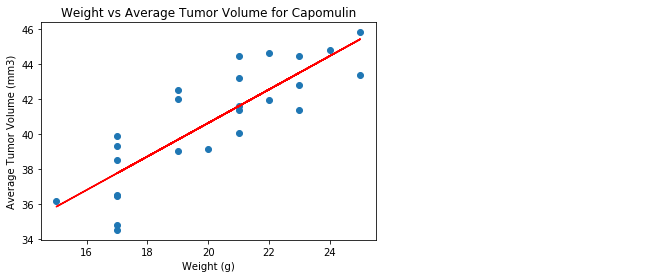

In [50]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

coef = round(st.pearsonr(weight_cap["Weight (g)"],mean_tumor_volume_cap["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen is {coef}")
                                                                                                                      
(slope, intercept, rvalue, pvalue, stderr)= linregress(weight_cap["Weight (g)"], mean_tumor_volume_cap["Tumor Volume (mm3)"])
regress_values= weight_cap * slope + intercept
line_eq= "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight_cap, mean_tumor_volume_cap, marker="o")
plt.plot(weight_cap, regress_values, "r-")
plt.annotate(line_eq,(30, 40),fontsize=15,color="red")
plt.title("Weight vs Average Tumor Volume for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show